Note: most of this comes from Wikipedia and my textbook: Mathematical Statistics with Applications 7th Edition

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm, binom, geom, poisson

import numpy as np
from bokeh.plotting import figure, show
from bokeh.layouts import row
from bokeh.io import output_notebook, push_notebook
output_notebook()

from ipywidgets import interact
from bokeh.models import ColumnDataSource

Loading BokehJS ...

# Discrete Random Variables

## Expectation
$E(Y) = \mu = \sum\limits_{y} yp(y)$

## Variance
$V(Y) = \sigma^2 = E[(Y-\mu)^2] = E(Y^2) - \mu^2$

## Binomial Distribution, $\mathcal{B}(n,p)$

$\mathcal{B}(n,p)$: $\mu = np, \sigma^2 = np(1-p), \tilde{\mu}_3 = \frac{1-2p}{\sqrt{np(1-p)}}, \tilde{\mu}_4 = \frac{1-6p(1-p)}{np(1-p)}$

PDF: $p(y) = \binom{n}{y}p^y q^{n-y}$

MGF: $m(t) = [pe^t + (1-p)]^n$

In [4]:
n, p = 20, 0.2
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print(mean, var, skew, kurt)

4.0 3.2 0.3354101966249685 0.012499999999999942


In [3]:
binomial_pdf = figure(title="Binomial PDF", width=400, height=400)
binomial_cdf = figure(title="Binomial CDF", width=400, height=400)

n, p = 10, 0.5
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
rv = binom(n, p)

bin_pdf = ColumnDataSource(data=dict(x=x, y=rv.pmf(x)))
bin_cdf = ColumnDataSource(data=dict(x=x, y=rv.cdf(x)))

binomial_pdf.scatter(bin_pdf.data["x"],bin_pdf.data["y"],source=bin_pdf,color="blue", size=10)
binomial_cdf.scatter(bin_cdf.data["x"],bin_cdf.data["y"],source=bin_cdf,color="red", size=10)

In [4]:
def binomial_update(n,p):
    x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
    rv = binom(n, p)
    bin_pdf.data['x'] = x
    bin_pdf.data['y'] = rv.pmf(x)
    bin_cdf.data['x'] = x
    bin_cdf.data['y'] = rv.cdf(x)
    push_notebook()

In [5]:
show(row(binomial_pdf, binomial_cdf))

In [6]:
interact(binomial_update, n=(1,100,5),p=(0.1,1,.01))

## Geometric Distribution
$\mu = \frac{1}{p}, \sigma^2 = \frac{q}{p^2}, \tilde{\mu}_3 = \frac{2-p}{\sqrt{1-p}}, \tilde{\mu}_4 = 6+\frac{p^2}{1-p}$

PDF: $p(y) = q^{y-1}p $ for $y \in Z^{+}, 0\leq p \leq 1$

CDF: $P(Y) = 1-q^k$

MGF: $\frac{pe^t}{1-qe^t}$

## Poisson Distribution
$\mu = \lambda, \sigma^2 = \lambda, \tilde{\mu}_3 = \lambda^{-\frac{1}{2}}, \tilde{\mu}_3 = \lambda^{-1}$

PDF: $p(y) = \frac{\lambda ^y}{y!}e^{-\lambda}$

MGF: $m(t) = exp[\lambda (e^t - 1)]$

# Continuous Random Variables

## Standard Normal, $\mathcal{N}(\mu,\sigma^2)$

$\mathcal{N}(0,1): \mu = 0, \sigma^{2} = 1, \tilde{\mu}_3 = 0, \tilde{\mu}_3 = 0$

PDF: $\mathcal{f}(y)=\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(y-\mu)^2}{2\sigma^2}}$

CDF: $F(y)=\int_{- \infty}^{y} \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(y-\mu)^2}{2\sigma^2}}dy = \frac{1}{2}(1+erf(\frac{y-\mu}{\sigma \sqrt{2}}))$

MGF: $m(t) = \mu t + \frac{\sigma^2 t^2}{2}$

In [24]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print(mean, var, skew, kurt)

0.0 1.0 0.0 0.0


-1.2815515655446004

In [7]:
rv = norm()

In [13]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

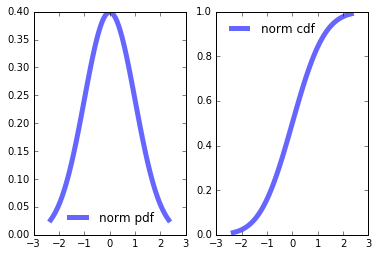

In [31]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(x, norm.pdf(x), 'b-', lw=5, alpha=0.6, label='norm pdf')
ax[0].legend(loc='best', frameon=False)
ax[1].plot(x, norm.cdf(x), 'b-', lw=5, alpha=0.6, label='norm cdf')
ax[1].legend(loc='best', frameon=False)
plt.show()

In [39]:
norm.cdf(-1)

0.15865525393145707

# Proofs and Derivations

### Derivation of Expectation and Variance of Binomial Random Variable

#### Expectation
$E(Y) = \mu = \sum\limits_{y} yp(y) = \sum\limits_{y=0}^{n} y\binom{n}{y}p^y q^{n-y}$

First term (y=0) is equal to zero. Also remember $\binom{n}{y} = \frac{n!}{y!(n-y)!}$

$= \sum\limits_{y=1}^{n} y\frac{n!}{y!(n-y)!}p^y q^{n-y} = \sum\limits_{y=1}^{n} \frac{n!}{(y-1)!(n-y)!}p^y q^{n-y}$

Factor out np and let z = y - 1.

$ = np\sum\limits_{y=1}^{n} \frac{(n-1)!}{(y-1)!(n-y)!}p^{y-1} q^{n-y} = np\sum\limits_{z=0}^{n-1} \frac{(n-1)!}{z!(n-1-z)!}p^{z} q^{n-1-z} = np\sum\limits_{z=0}^{n-1} \binom{n-1}{z}p^{z} q^{n-1-z}$

$\sum\limits_{z}p(z) =\sum\limits_{z=0}^{n-1} \binom{n-1}{z}p^{z} q^{n-1-z} = 1$ by definition of probability. So, $\mu = E(Y) = np$

#### Variance
$V(Y) = \sigma^2 = E(Y^2) - \mu^2$

$E(Y^2) = \sum\limits_{y=0}^{n}y^2p(y) = \sum\limits_{y=0}^{n} y^2\binom{n}{y}p^y q^{n-y}$

$y^2$ doesn't factor so instead see that...

$E[Y(Y-1)] = E[Y^2 - Y] = E(Y^2) - E(Y)$

Therefore:

$E(Y^2) = E[Y(Y-1)] + \mu$

Substituting in then realizing first and second terms of sum equal zero...

$E[Y(Y-1)] = \sum\limits_{y=0}^{n} y(y-1)\frac{n!}{y!(n-y)!}p^{y} q^{n-y} = \sum\limits_{y=2}^{n} \frac{n!}{(y-2)!(n-y)!}p^{y} q^{n-y}$ 

Factor out $n(n-1)p^2$ and let $z = y - 2:$

$= n(n-1)p^2\sum\limits_{y=2}^{n} \frac{(n-2)!}{(y-2)!(n-y)!}p^{y-2} q^{n-y} = n(n-1)p^2\sum\limits_{z=0}^{n-2} \frac{(n-2)!}{z!(n-2-z)!}p^{z} q^{n-2-z}$

Now we see that again the sum equals one and we are left with $E[Y(Y-1)] = n(n-1)p^2$. Plug this into the equation for $E(Y^2)$ from before.

$E(Y^2) = E[Y(Y-1)] + \mu = n(n-1)p^2 + np$

So...

$V(Y) = \sigma^2 = E(Y^2) - \mu^2 = n(n-1)p^2 + np - n^2p^2 = np[(n-1)p + 1 - np] = np(1-p) = npq$

In [25]:
n, p = 10, 0.2
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
print(x)
rv = binom(n, p)
print(rv.pmf(x))

[ 0.  1.  2.  3.  4.]
[ 0.10737418  0.26843546  0.30198989  0.20132659  0.08808038]


In [146]:
chart1 = figure(title="PDF", width=400, height=400)
chart2 = figure(title="CDF", width=400, height=400)

n, p = 10, 0.5
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
rv = binom(n, p)

source1 = ColumnDataSource(data=dict(x=x, y=rv.pmf(x)))
source2 = ColumnDataSource(data=dict(x=x, y=rv.cdf(x)))

chart1.scatter(source1.data["x"],source1.data["y"],source=source1,color="blue", size=10)
chart2.scatter(source2.data["x"],source2.data["y"],source=source2,color="red", size=10)

In [143]:
def binomial_update(n,p):
    x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
    rv = binom(n, p)
    source1.data['x'] = x
    source1.data['y'] = rv.pmf(x)
    source2.data['x'] = x
    source2.data['y'] = rv.cdf(x)
    source.push_notebook()

In [144]:
show(row(chart1, chart2))

In [145]:
interact(binomial_update, n=(1,100,5),p=(0.1,1,.01))

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:8: BokehDeprecationWarning: bokeh.models.sources.push_notebook was deprecated in Bokeh 0.11.0; please use bokeh.io.push_notebook instead


<function __main__.binomial_update>